In [33]:
import numpy as np
import pandas as pd
import os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
from datetime import datetime
import emoji
import contractions

In [3]:
path = 'data/birth_year.csv'
df_birthyear = pd.read_csv(path)
df_birthyear.sort_values(by="birth_year", ascending=True, inplace=True)
df_birthyear.head()

,auhtor_ID,post,birth_year
28446,t2_9v6260me,a trope among this sub and almost everyone joi...,1948
28445,t2_9v6260me,door question” decorated with an extreme helpi...,1948
28444,t2_9v6260me,"Unless you live at home, why would you put up ...",1948
28456,t2_9v6260me,my mind) any possibility of another religion b...,1948
28457,t2_9v6260me,and our mental health is linked to our physica...,1948


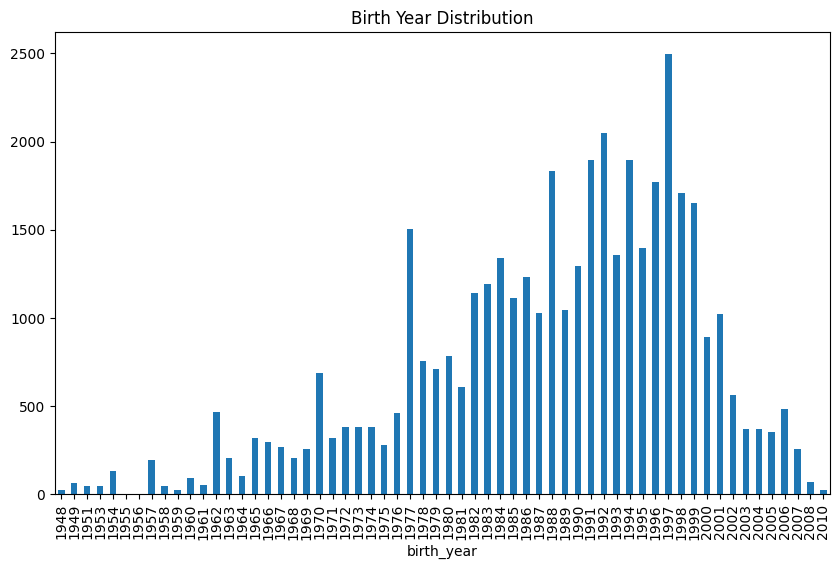

In [4]:
# plot a piechart with birth years
df_count = df_birthyear.value_counts('birth_year').sort_index()
fig = plt.figure(figsize=(10, 6))
ax = df_count.plot.bar()
plt.title('Birth Year Distribution');

In [5]:
delay = 0                           # in years, to account for the time between publishing and now
current_year = datetime.now().year
df_birthyear['age'] = current_year - df_birthyear['birth_year'] - delay
df_birthyear['age_range'] = df_birthyear['age'] // 10
df_birthyear = df_birthyear[(df_birthyear['age_range'] >= 2) & (df_birthyear['age_range'] <= 5)]
df_birthyear.head()

,auhtor_ID,post,birth_year,age,age_range
11388,t2_aikaukqc,experience than you might imagine. Have you co...,1966,59,5
11397,t2_aikaukqc,of total betrayal created him. His half siblin...,1966,59,5
11398,t2_aikaukqc,likely be started on a med called Metformin or...,1966,59,5
11399,t2_aikaukqc,it in writing and witnessed. Dogs are amazing....,1966,59,5
11413,t2_aikaukqc,and I will give you some other companies to lo...,1966,59,5


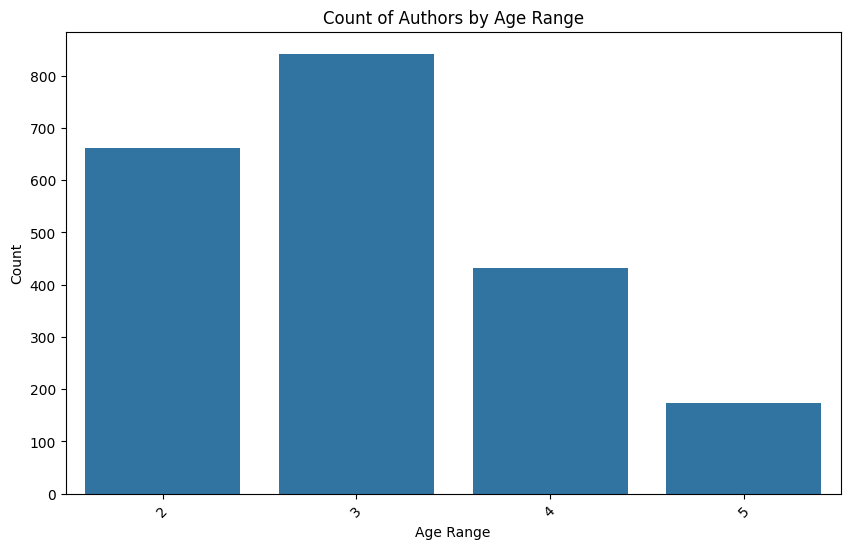

In [6]:
# Create a temporary DataFrame with unique authors
unique_authors = df_birthyear.loc[df_birthyear['auhtor_ID'].drop_duplicates().index]

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=unique_authors)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Count of Authors by Age Range')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Preprocessing using nltk

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt_tab')
import contractions
import unicodedata
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zitag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zitag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
df_birthyear['clean_post'] = np.nan

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_post(post):
    words = word_tokenize(post.lower())
    words = [contractions.fix(word) for word in words]
    words = [unicodedata.normalize('NFKD', word).encode('ASCII', 'ignore').decode('utf-8') for word in words]
    words = [re.sub(r"(https|http)?:\S*", "", word) for word in words]
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return str(words)

tqdm.pandas()
df_birthyear['clean_post'] = df_birthyear['post'].progress_apply(clean_post)
df_birthyear.reset_index(drop=True, inplace=True)

100%|██████████| 39254/39254 [10:20<00:00, 63.30it/s]


In [9]:
df_birthyear.head()

,auhtor_ID,post,birth_year,age,age_range,clean_post
0,t2_aikaukqc,experience than you might imagine. Have you co...,1966,59,5,"['experi', 'might', 'imagin', 'consid', 'built..."
1,t2_aikaukqc,of total betrayal created him. His half siblin...,1966,59,5,"['total', 'betray', 'creat', 'half', 'sibl', '..."
2,t2_aikaukqc,likely be started on a med called Metformin or...,1966,59,5,"['like', 'start', 'med', 'call', 'metformin', ..."
3,t2_aikaukqc,it in writing and witnessed. Dogs are amazing....,1966,59,5,"['write', 'wit', 'dog', 'amaz', 'need', 'abl',..."
4,t2_aikaukqc,and I will give you some other companies to lo...,1966,59,5,"['give', 'compani', 'look', 'send', 'resum', '..."


## Feature engineering based on stylometry features

In [35]:
#Adding new columns
df_birthyear['num_characters'] = df_birthyear['post'].apply(len)
df_birthyear['num_special_symbols'] = df_birthyear['post'].apply(lambda x: len(re.findall(r'[!?#%$@&<>-_]', x)))
df_birthyear['num_emojis'] = df_birthyear['post'].apply(
    lambda x: len([char for char in x if char in emoji.EMOJI_DATA]))
df_birthyear['num_contractions'] = df_birthyear['post'].apply(
    lambda text: sum(1 for word in text.split() if word in contractions.contractions_dict))

In [28]:
def plotting_features(df, feature):
    feature_mean = df.groupby('age_range')[feature].mean()
    plt.figure(figsize=(10, 6))
    plt.bar(feature_mean.index.astype(str), feature_mean.values, color='skyblue')
    plt.title(f"Average {feature} by Age Range")
    plt.xlabel("Age Range")
    plt.ylabel(f"Average {feature}")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

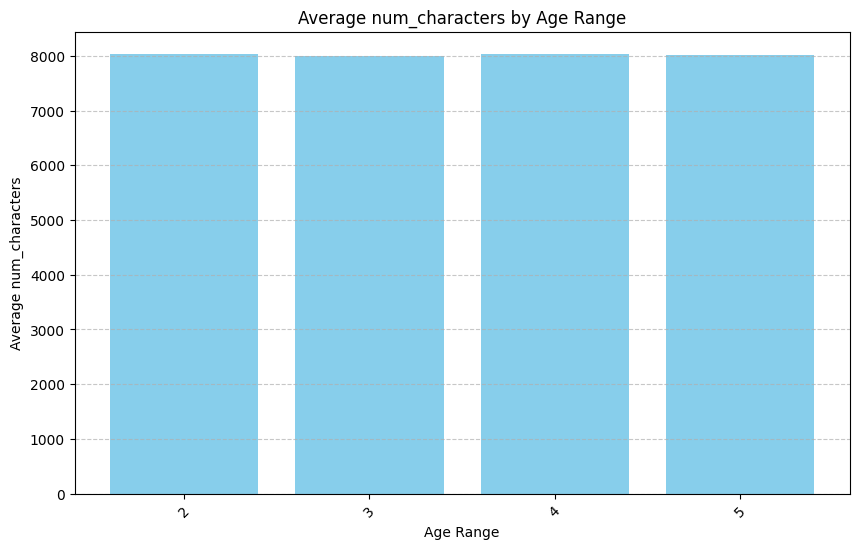

In [29]:
plotting_features(df_birthyear, 'num_characters')

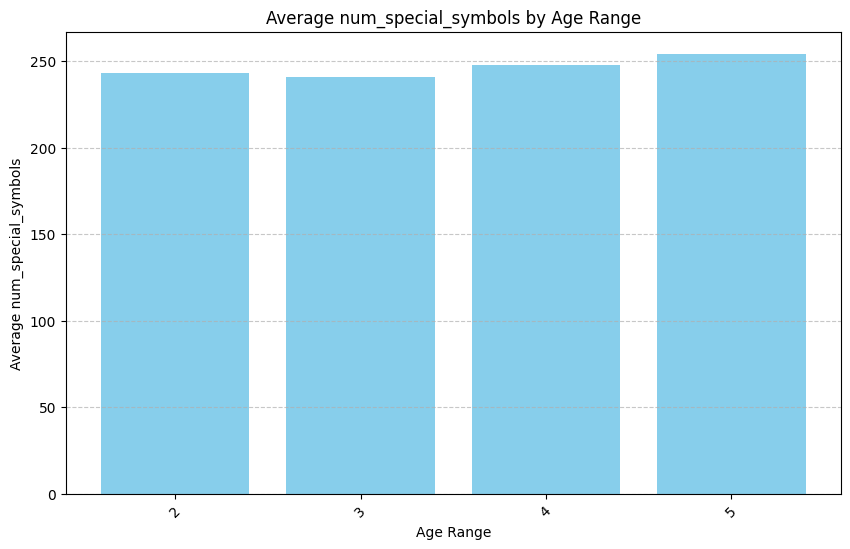

In [31]:
plotting_features(df_birthyear, 'num_special_symbols')

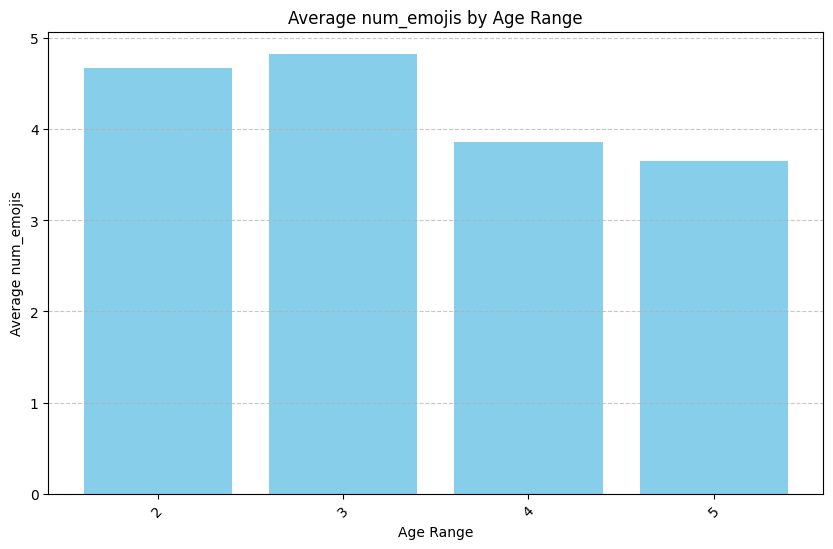

In [32]:
plotting_features(df_birthyear, 'num_emojis')

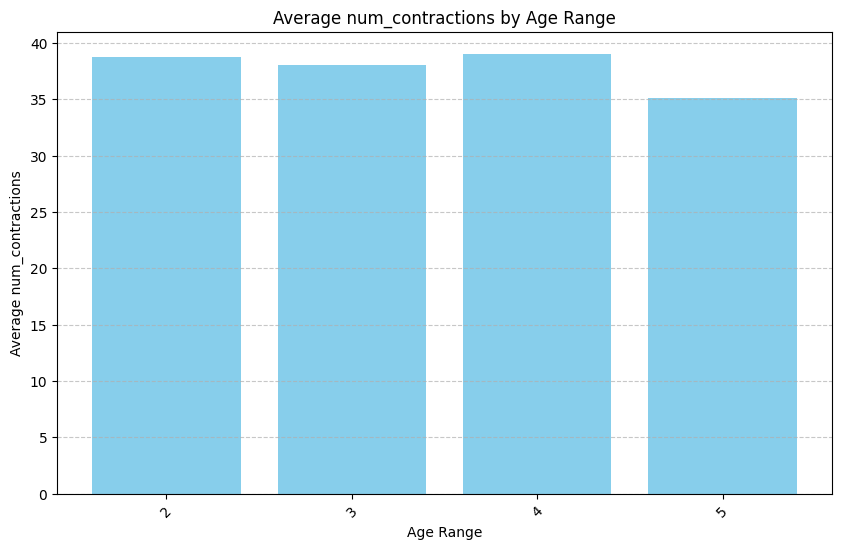

In [36]:
plotting_features(df_birthyear, 'num_contractions')

## Normalization by sampling based on age

In [38]:
# sample df_unique_authors based on age to normalize
df_unique_authors = df_birthyear.drop_duplicates(subset='auhtor_ID')
n_samples = 150
df_normalized = df_unique_authors.groupby('age_range').sample(n=n_samples, random_state=42)
df_normalized.head()

,auhtor_ID,post,birth_year,age,age_range,clean_post,num_characters,num_special_symbols,num_emojis,contraction_count,num_contractions
34865,t2_3h3t0mb,record was 285 in May) **New States:** Illinoi...,1999,26,2,"['record', 'may', 'new', 'state', 'illinoi', '...",7985,424,1,41,41
38303,t2_ga9jkp22,Girly I am 20 with barely an a cup. I know it’...,2003,22,2,"['girli', 'bare', 'cup', 'know', 'difficult', ...",7864,213,11,30,30
36840,t2_8g3ecofl,"food you like in a single day, you're allowed ...",2001,24,2,"['food', 'like', 'singl', 'day', 'allow', 'tak...",2183,97,10,11,11
35322,t2_txn1p,so frustrating! Right. I am just frustrated th...,1999,26,2,"['frustrat', 'right', 'frustrat', 'thing', 'li...",3929,142,0,17,17
33673,t2_46463x14,"and smelly. shower? i’ll eat in the shower, ge...",1998,27,2,"['smelli', 'shower', 'eat', 'shower', 'get', '...",7819,235,1,35,35


In [39]:
# count age range in unique authors to check sampling
df_normalized['age_range'].value_counts()

age_range
2    150
3    150
4    150
5    150
Name: count, dtype: int64

## Save dataframes

In [40]:
# to pickle
if not os.path.exists('preprocessed_data'):
    os.makedirs('preprocessed_data')
df_birthyear.to_pickle('preprocessed_data/df_birthyear.pkl')
df_normalized.to_pickle('preprocessed_data/df_normalized.pkl')

## Extra: Function breakdown

In [41]:
i = random.randint(0, len(df_birthyear))
post = df_birthyear['post'][i]
print(post)

Jared? What about the Liahona? Even in modern times, I think it's important to believe in a literal first vision. Don't we need to believe that Moroni actually appeared? I too understand and appreciate symbolism in scriptures. I hear what you're saying and I think your insights are valuable, but Christianity itself hangs upon some level of belief in the fantastical. So, I don't necessarily take everything to be literral, but I do encounter an error in my logic if I start saying that manna from heaven is too hard to believe in, but the resurrection of Christ is okay. You're in luck because we don't even believe in Hell remember? It's very difficult to try and live up to somebody else's expectations. Heck, I can barely live up to my own expectations let alone someone else. It seems like you need to decide what you believe in. It sounds like you live some commandments and not others. Might I suggest that some of the lack of understanding and spiritual experiences with the gospel may be ro

### Tokenization
split the sentence up in to smaller part, here it is split up into words

In [42]:
words = word_tokenize(post.lower())
print(words)

['jared', '?', 'what', 'about', 'the', 'liahona', '?', 'even', 'in', 'modern', 'times', ',', 'i', 'think', 'it', "'s", 'important', 'to', 'believe', 'in', 'a', 'literal', 'first', 'vision', '.', 'do', "n't", 'we', 'need', 'to', 'believe', 'that', 'moroni', 'actually', 'appeared', '?', 'i', 'too', 'understand', 'and', 'appreciate', 'symbolism', 'in', 'scriptures', '.', 'i', 'hear', 'what', 'you', "'re", 'saying', 'and', 'i', 'think', 'your', 'insights', 'are', 'valuable', ',', 'but', 'christianity', 'itself', 'hangs', 'upon', 'some', 'level', 'of', 'belief', 'in', 'the', 'fantastical', '.', 'so', ',', 'i', 'do', "n't", 'necessarily', 'take', 'everything', 'to', 'be', 'literral', ',', 'but', 'i', 'do', 'encounter', 'an', 'error', 'in', 'my', 'logic', 'if', 'i', 'start', 'saying', 'that', 'manna', 'from', 'heaven', 'is', 'too', 'hard', 'to', 'believe', 'in', ',', 'but', 'the', 'resurrection', 'of', 'christ', 'is', 'okay', '.', 'you', "'re", 'in', 'luck', 'because', 'we', 'do', "n't", 'eve

### Removing all characters except letters

idea: maybe we should keep exclamantion/question marks and other characters, like ;) that could predict age potentially

In [43]:
words = [word for word in words if word.isalpha()]
print(words)

['jared', 'what', 'about', 'the', 'liahona', 'even', 'in', 'modern', 'times', 'i', 'think', 'it', 'important', 'to', 'believe', 'in', 'a', 'literal', 'first', 'vision', 'do', 'we', 'need', 'to', 'believe', 'that', 'moroni', 'actually', 'appeared', 'i', 'too', 'understand', 'and', 'appreciate', 'symbolism', 'in', 'scriptures', 'i', 'hear', 'what', 'you', 'saying', 'and', 'i', 'think', 'your', 'insights', 'are', 'valuable', 'but', 'christianity', 'itself', 'hangs', 'upon', 'some', 'level', 'of', 'belief', 'in', 'the', 'fantastical', 'so', 'i', 'do', 'necessarily', 'take', 'everything', 'to', 'be', 'literral', 'but', 'i', 'do', 'encounter', 'an', 'error', 'in', 'my', 'logic', 'if', 'i', 'start', 'saying', 'that', 'manna', 'from', 'heaven', 'is', 'too', 'hard', 'to', 'believe', 'in', 'but', 'the', 'resurrection', 'of', 'christ', 'is', 'okay', 'you', 'in', 'luck', 'because', 'we', 'do', 'even', 'believe', 'in', 'hell', 'remember', 'it', 'very', 'difficult', 'to', 'try', 'and', 'live', 'up',

### Removing stopwords
Stopwords are frequently occurring words in a language that are frequently omitted from natural language processing (NLP) tasks due to their low significance for deciphering textual meaning. The particular list of stopwords can change based on the language being studied and the context. The following is a broad list of stopword categories:

*Common Stopwords*: These are the most frequently occurring words in a language and are often removed during text preprocessing. Examples include “the,” “is,” “in,” “for,” “where,” “when,” “to,” “at,” etc.

*Custom Stopwords*: Depending on the specific task or domain, additional words may be considered as stopwords. These could be domain-specific terms that don’t contribute much to the overall meaning. For example, in a medical context, words like “patient” or “treatment” might be considered as custom stopwords.

*Numerical Stopwords*: Numbers and numeric characters may be treated as stopwords in certain cases, especially when the analysis is focused on the meaning of the text rather than specific numerical values

*Single-Character Stopwords*: Single characters, such as “a,” “I,” “s,” or “x,” may be considered stopwords, particularly in cases where they don’t convey much meaning on their own.

*Contextual Stopwords*: Words that are stopwords in one context but meaningful in another may be considered as contextual stopwords. For instance, the word “will” might be a stopword in the context of general language processing but could be important in predicting future events.

In [44]:
words = [word for word in words if word not in stopwords.words('english')]  #removes english stopwords
print(words)

['jared', 'liahona', 'even', 'modern', 'times', 'think', 'important', 'believe', 'literal', 'first', 'vision', 'need', 'believe', 'moroni', 'actually', 'appeared', 'understand', 'appreciate', 'symbolism', 'scriptures', 'hear', 'saying', 'think', 'insights', 'valuable', 'christianity', 'hangs', 'upon', 'level', 'belief', 'fantastical', 'necessarily', 'take', 'everything', 'literral', 'encounter', 'error', 'logic', 'start', 'saying', 'manna', 'heaven', 'hard', 'believe', 'resurrection', 'christ', 'okay', 'luck', 'even', 'believe', 'hell', 'remember', 'difficult', 'try', 'live', 'somebody', 'else', 'expectations', 'heck', 'barely', 'live', 'expectations', 'let', 'alone', 'someone', 'else', 'seems', 'like', 'need', 'decide', 'believe', 'sounds', 'like', 'live', 'commandments', 'others', 'might', 'suggest', 'lack', 'understanding', 'spiritual', 'experiences', 'gospel', 'may', 'rooted', 'lack', 'engagement', 'living', 'gospel', 'check', 'nephi', 'laman', 'lemuel', 'understand', 'lord', 'eith

In [45]:
word_freq = Counter(words)
print(word_freq.most_common(10))

[('think', 10), ('church', 10), ('gospel', 8), ('things', 7), ('make', 6), ('know', 6), ('believe', 5), ('else', 5), ('like', 5), ('going', 5)]
